In [96]:
import pandas as pd 
import numpy as np
import seaborn as sns

In [97]:
df=pd.read_csv('pima-data.csv')
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


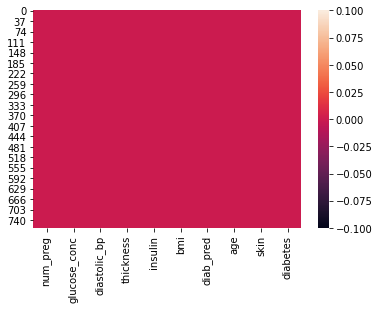

In [98]:
sns.heatmap(df.isnull())

In [99]:

df['diabetes'].replace({True:1,False:0},inplace=True)


In [100]:
df.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,1
1,1,85,66,29,0,26.6,0.351,31,1.1426,0
2,8,183,64,0,0,23.3,0.672,32,0.0000,1
3,1,89,66,23,94,28.1,0.167,21,0.9062,0
4,0,137,40,35,168,43.1,2.288,33,1.3790,1


In [101]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [102]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)
xtrain.head()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin
603,7,150,78,29,126,35.2,0.692,54,1.1426
118,4,97,60,23,0,28.2,0.443,22,0.9062
247,0,165,90,33,680,52.3,0.427,23,1.3002
157,1,109,56,21,135,25.2,0.833,23,0.8274
468,8,120,0,0,0,30.0,0.183,38,0.0000


In [103]:
for var in xtrain.columns:
  a=np.mean(df[var])
  xtrain[var].replace({0:a},inplace=True)
xtrain.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4581: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin
603,7.000000,150.0,78.000000,29.000000,126.000000,35.2,0.692,54,1.142600
118,4.000000,97.0,60.000000,23.000000,79.799479,28.2,0.443,22,0.906200
247,3.845052,165.0,90.000000,33.000000,680.000000,52.3,0.427,23,1.300200
157,1.000000,109.0,56.000000,21.000000,135.000000,25.2,0.833,23,0.827400
468,8.000000,120.0,69.105469,20.536458,79.799479,30.0,0.183,38,0.809136


In [104]:
for var in xtest.columns:
  a=np.mean(df[var])
  xtest[var].replace({0:a},inplace=True)
xtest.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4581: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin
661,1.000000,199.0,76.0,43.000000,79.799479,42.9,1.394,22,1.694200
122,2.000000,107.0,74.0,30.000000,100.000000,33.6,0.404,23,1.182000
113,4.000000,76.0,62.0,20.536458,79.799479,34.0,0.391,25,0.809136
14,5.000000,166.0,72.0,19.000000,175.000000,25.8,0.587,51,0.748600
529,3.845052,111.0,65.0,20.536458,79.799479,24.6,0.660,31,0.809136


In [105]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.transform(xtest)


In [106]:
xtest

array([[-1.1461866 ,  2.55688505,  0.29184926, ...,  2.78594417,
        -0.96569189,  1.67888712],
       [-0.81582693, -0.48558291,  0.12553806, ..., -0.1876381 ,
        -0.88240283,  0.33898226],
       [-0.1551076 , -1.51076233, -0.87232915, ..., -0.22668514,
        -0.71582471, -0.63642124],
       ...,
       [-0.1551076 ,  0.67187772,  1.12340527, ...,  0.53623395,
        -0.96569189, -0.63642124],
       [-0.48546727, -0.18795018,  0.12553806, ..., -1.07971278,
        -0.79911377, -1.20706181],
       [-1.1461866 , -0.48558291, -0.04077314, ...,  1.06487079,
        -0.79911377,  0.33898226]])

In [107]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100)
rf.fit(xtrain,ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [108]:
pred=rf.predict(xtest)
from sklearn.metrics import accuracy_score
ac=accuracy_score(ytest,pred)
ac

0.8376623376623377

In [109]:
from sklearn import metrics
metrics.r2_score(ytest, pred)

0.2344402465698946

In [110]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest,pred)

array([[93, 14],
       [11, 36]])